In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from statsmodels.formula.api import poisson
from statsmodels.formula.api import glm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf




In [43]:
# importer la base de données
data = pd.read_excel('/content/Data_CAN.xlsx')


In [44]:
# point global du nombre de ligne et de colonne.
print(data.shape)

(752, 17)


In [45]:
# Liste du nom des colonnes.
print(data.keys())

Index(['Ordre', 'ANNÉE', 'MOIS', 'Date', 'IAC_CAN', 'T90_IAC', 'T10_IAC',
       'P_IAC', 'D_IAC', 'WP90_IAC', 'S_IAC', 'Saison', 'S&P_TSX_mouv',
       'S&P_TSX_Der', 'S&P_TSX_Ouv', 'S&P_TSX_Hau', 'S&P_TSX_Bas'],
      dtype='object')


In [46]:
# Categorisation par type variable

data_types = data.dtypes
numeric_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

print("Variables numériques:", numeric_columns)
print("Variables catégoriques:", categorical_columns)

Variables numériques: ['Ordre', 'ANNÉE', 'IAC_CAN', 'T90_IAC', 'T10_IAC', 'P_IAC', 'D_IAC', 'WP90_IAC', 'S_IAC', 'S&P_TSX_mouv', 'S&P_TSX_Der', 'S&P_TSX_Ouv', 'S&P_TSX_Hau', 'S&P_TSX_Bas']
Variables catégoriques: ['MOIS', 'Date', 'Saison']


In [47]:
# Obtenir un résumé des valeurs manquantes dans chaque colonne
data.isnull().sum()

Ordre             0
ANNÉE             0
MOIS              0
Date              0
IAC_CAN           0
T90_IAC           0
T10_IAC           0
P_IAC             0
D_IAC             0
WP90_IAC          0
S_IAC             0
Saison            0
S&P_TSX_mouv    222
S&P_TSX_Der     221
S&P_TSX_Ouv     221
S&P_TSX_Hau     221
S&P_TSX_Bas     221
dtype: int64

In [48]:
# Obtention de statistiques descriptives pour les variables numériques
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ordre,752.0,376.500000,217.227991,1.0000,188.750000,376.50000,564.2500,752.0000
ANNÉE,752.0,1991.835106,18.103106,1961.0000,1976.000000,1992.00000,2007.2500,2023.0000
IAC_CAN,752.0,0.175731,0.521246,-1.2300,-0.170000,0.16500,0.5000,2.0200
T90_IAC,752.0,0.302620,1.082751,-1.8600,-0.500000,0.19500,0.9500,5.0700
T10_IAC,752.0,-0.329388,1.025280,-2.6000,-1.100000,-0.52000,0.3100,3.4800
P_IAC,752.0,0.371303,1.152327,-2.5100,-0.422500,0.32000,1.0900,5.1900
D_IAC,752.0,-0.098976,1.156897,-2.6200,-0.960000,-0.21500,0.6025,3.5100
WP90_IAC,752.0,0.274016,1.012226,-2.2000,-0.472500,0.27000,0.9025,4.2400
S_IAC,752.0,-0.123431,1.021578,-3.6000,-0.810000,-0.16000,0.5325,3.1900
S&P_TSX_mouv,530.0,0.005790,0.044339,-0.2263,-0.016075,0.00865,0.0330,0.1427


In [49]:
# Obtention de statistiques descriptives pour les variables catégoriques
data.describe(include=['object']).transpose()

,count,unique,top,freq
MOIS,752,12,Janvier,63
Date,752,752,Janvier 1961,1
Saison,752,4,Printemps,189


In [50]:
#Traittement des valeurs manquantes :: suppression des lignes pour toutes les variables manquantes

data.dropna(subset=numeric_columns, inplace=True)

In [51]:
# verification et control de correction par rapport aux valeurs manquantes
data.isnull().sum()

Ordre           0
ANNÉE           0
MOIS            0
Date            0
IAC_CAN         0
T90_IAC         0
T10_IAC         0
P_IAC           0
D_IAC           0
WP90_IAC        0
S_IAC           0
Saison          0
S&P_TSX_mouv    0
S&P_TSX_Der     0
S&P_TSX_Ouv     0
S&P_TSX_Hau     0
S&P_TSX_Bas     0
dtype: int64

In [52]:
# point global du nombre de ligne et de colonne apres traitement des valeurs manquantes
print(data.shape)

(530, 17)


In [53]:
# Transfornation de la varialle categorielle saison en variable binaire
data_mod=pd.get_dummies(data, columns=['Saison'])
data_mod

,Ordre,ANNÉE,MOIS,Date,IAC_CAN,T90_IAC,T10_IAC,P_IAC,D_IAC,WP90_IAC,S_IAC,S&P_TSX_mouv,S&P_TSX_Der,S&P_TSX_Ouv,S&P_TSX_Hau,S&P_TSX_Bas,Saison_Automne,Saison_Hiver,Saison_Printemps,Saison_Été
222,223,1979,Juillet,Juillet 1979,0.30,0.87,-0.93,-0.63,0.14,0.93,-0.45,-0.0373,1695.30,1695.30,1695.30,1553.08,False,False,False,True
223,224,1979,Août,Août 1979,-0.42,-0.28,-0.03,-1.38,0.10,-0.47,-0.55,0.0881,1751.89,1751.89,1761.06,1659.36,False,False,False,True
224,225,1979,Septembre,Septembre 1979,0.22,0.22,-1.24,0.11,0.07,-0.57,0.24,0.0334,1579.27,1579.27,1807.41,1514.83,True,False,False,False
225,226,1979,Octobre,Octobre 1979,0.28,0.74,-0.60,0.68,0.03,-0.95,0.55,-0.0985,1699.62,1699.62,1709.67,1572.90,True,False,False,False
226,227,1979,Novembre,Novembre 1979,0.13,2.02,-0.67,-0.90,0.00,-0.63,-0.38,0.0762,1813.17,1813.17,1813.48,1697.69,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,748,2023,Avril,Avril 2023,0.30,-0.06,0.37,2.23,0.19,0.89,-1.06,0.0267,19572.24,20663.68,20766.87,19522.58,False,False,True,False
748,749,2023,Mai,Mai 2023,0.64,2.66,-1.66,0.08,0.40,0.51,-1.45,-0.0516,20155.29,19573.00,20178.81,19400.70,False,False,True,False
749,750,2023,Juin,Juin 2023,1.09,2.57,-1.64,2.11,0.62,0.52,-0.96,0.0298,20626.64,20180.28,20677.25,19719.58,False,False,False,True
750,751,2023,Juillet,Juillet 2023,0.29,1.94,-1.74,-0.60,0.84,-1.89,-0.28,0.0234,20292.62,20570.56,20585.87,19675.13,False,False,False,True


In [54]:
# Generation de la matrice de corrélation pour aider à faire choix de la variables à considerer pour la regression

new_data1 =data.drop(['Saison'], axis=1)
new_data2 =new_data1.drop(['MOIS'], axis=1)
new_data3 =new_data2.drop(['ANNÉE'], axis=1)
new_data4 =new_data3.drop(['Ordre'], axis=1)
new_data5 =new_data4.drop(['Date'], axis=1)
new_data6 =new_data5.drop(['S&P_TSX_Bas'], axis=1)
new_data7 =new_data6.drop(['S&P_TSX_Hau'], axis=1)
new_data =new_data7.drop(['S&P_TSX_Ouv'], axis=1)


correlation_matrix = new_data.corr()
print(correlation_matrix['S&P_TSX_Der'].sort_values(ascending=False))

#new_data

S&P_TSX_Der     1.000000
IAC_CAN         0.427995
P_IAC           0.361937
D_IAC           0.252189
T90_IAC         0.211872
S_IAC           0.057981
WP90_IAC        0.047168
S&P_TSX_mouv    0.002321
T10_IAC        -0.263532
Name: S&P_TSX_Der, dtype: float64


Text(0.5, 1.0, 'Matrice de corrélation entre chaque variable et la variable cible')

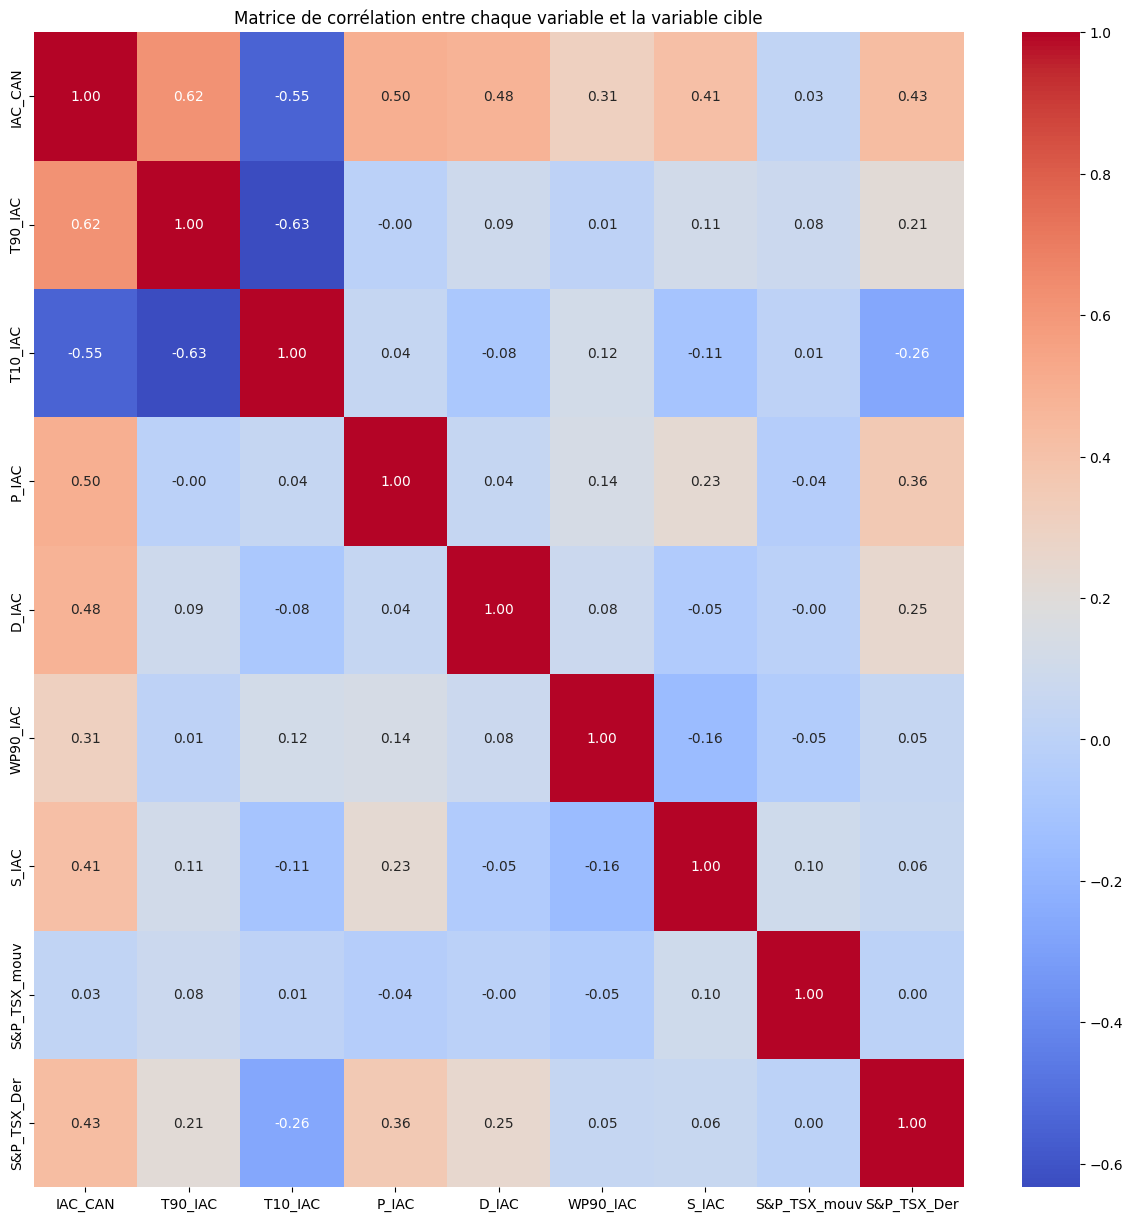

In [55]:
# Matrice de corrélation
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre chaque variable et la variable cible')
#plt.show()

In [56]:
print(data_mod.keys())

Index(['Ordre', 'ANNÉE', 'MOIS', 'Date', 'IAC_CAN', 'T90_IAC', 'T10_IAC',
       'P_IAC', 'D_IAC', 'WP90_IAC', 'S_IAC', 'S&P_TSX_mouv', 'S&P_TSX_Der',
       'S&P_TSX_Ouv', 'S&P_TSX_Hau', 'S&P_TSX_Bas', 'Saison_Automne',
       'Saison_Hiver', 'Saison_Printemps', 'Saison_Été'],
      dtype='object')


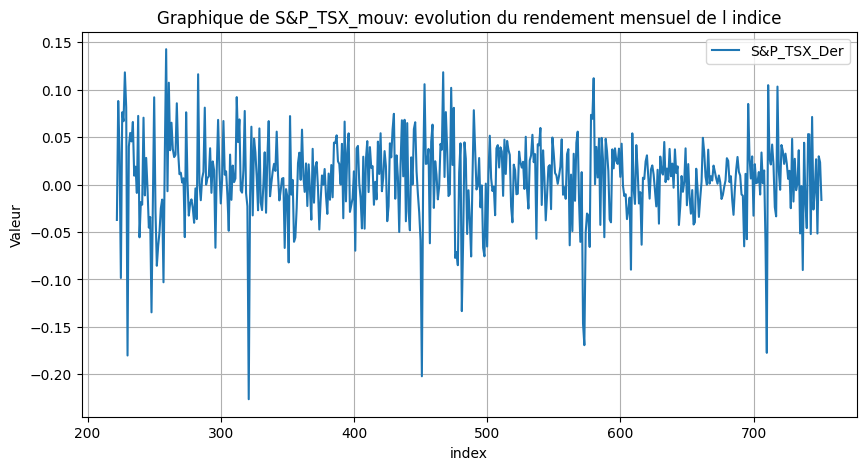

In [57]:
# Tracé de la courbe du rendement mensuel (S&P_TSX_mouv) de l'indice boursier S&P_TSX  :
plt.figure(figsize=(10, 5))
plt.plot(data['S&P_TSX_mouv'], label='S&P_TSX_Der')
plt.title('Graphique de S&P_TSX_mouv: evolution du rendement mensuel de l indice')
plt.xlabel('index')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.show()

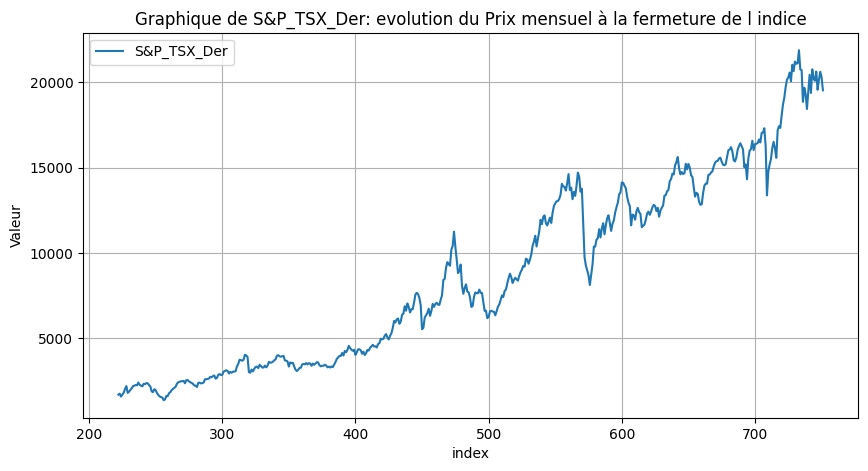

In [58]:
# Tracé de la courbe du Prix mensuel (S&P_TSX_Der) de l'indice boursier S&P_TSX  :
plt.figure(figsize=(10, 5))
plt.plot(data['S&P_TSX_Der'], label='S&P_TSX_Der')
plt.title('Graphique de S&P_TSX_Der: evolution du Prix mensuel à la fermeture de l indice')
plt.xlabel('index')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.show()

### **On remarque clairement que le prix des actifs presente des tendances**

### **REGRESSIONS LINEAIRES AVEC LA VARIABLE DEPENDANTE: S&P_TSX_mouv**

In [59]:
# Sélection des variables indépendantes et de la variable dépendante
X_1 = data_mod[['Saison_Hiver','Saison_Été', 'Saison_Printemps','Saison_Automne']].astype(int) # ajouter'T90_IAC', 'T10_IAC','P_IAC', 'D_IAC', 'WP90_IAC'
X_2 = data_mod[['IAC_CAN']]

X =pd.concat([X_1, X_2], axis=1)

y = data_mod['S&P_TSX_mouv'] # utiliser aussi 'S&P_TSX_Der'

# Ajout d'une constante à X pour inclure l'intercept
X = sm.add_constant(X)

# Création et ajustement du modèle de régression linéaire OLS
model = sm.OLS(y, X)
results = model.fit()

# Affichage du résumé des résultats du modèle
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           S&P_TSX_mouv   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.212
Date:                Sun, 02 Jun 2024   Prob (F-statistic):              0.305
Time:                        20:05:56   Log-Likelihood:                 902.32
No. Observations:                 530   AIC:                            -1795.
Df Residuals:                     525   BIC:                            -1773.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0041      0.002  

### **COMMENTAIRES ET INTERPRETATIONS :**

**R-squared: 0.009** - Ce modèle explique environ 0.9% de la variabilité des mouvements de l'indice S&P_TSX. Cela suggère que les variables incluses n'ont qu'une très faible capacité explicative pour les mouvements de cet indice.

**Adj. R-squared: 0.002**  - Ce chiffre ajusté pour le nombre de prédicteurs dans le modèle indique une très faible utilité prédictive globale des variables.

**F-statistic: 1.212** avec une p-value de 0.307 - Indique que le modèle n'est pas statistiquement significatif au niveau global, ce qui signifie que les variables n'expliquent pas de manière significative les variations du S&P_TSX.

**constante (0.0041):** Indique le mouvement moyen de l'indice S&P_TSX lorsque toutes les variables sont à zéro (hors saison, valeur de base). Ce coefficient est statistiquement significatif (p=0.02 < 0.05).

**Saison_Hiver (0.0062):** Suggère un impact positif sur la variation de l'indice S&P_TSX pendant l'hiver, statistiquement significatif (p = 0.065).

**Saison_Été (-0.0012):** Montre un impact très faible et non significatif sur la variation de l'indice pendant l'été (p = 0.726).

**Saison_Printemps (0.0034):** Indique un léger impact positif au printemps, mais ce n'est pas statistiquement significatif (p = 0.308).

**Saison_Automne (-0.0044):** Suggère un léger impact négatif en automne, également non significatif (p = 0.192).

**IAC_CAN (0.0025):** Montre un léger impact positif, mais ce n'est pas statistiquement significatif (p = 0.494).

**Durbin-Watson (1.848):** Cette statistique indique une faible autocorrélation des résidus, suggérant une indépendance des erreurs, ce qui est une bonne caractéristique pour un modèle de régression.

**Omnibus (96.647) et Jarque-Bera (320.638):** Les tests suggèrent que les résidus ne sont pas normalement distribués, ce qui peut affecter certaines des hypothèses sous-jacentes à l'analyse de régression classique c'est à dire un signe que le modèle ne capture pas toutes les dynamiques pertinentes ou que certaines hypothèses de la régression linéaire ne sont pas respectées.


### **CONCLUSION ET RECOMMANDATIONS :**

Les résultats de cette analyse indiquent que le modèle a une capacité limitée à expliquer les mouvements de l'indice S&P_TSX. La majorité des variables, incluant les variables saisonnières et l'IAC_CAN, n'ont pas montré d'effet statistiquement significatif. Cela peut suggérer la nécessité de revoir le modèle, d'inclure d'autres variables explicatives potentielles, ou d'examiner d'autres formes de modélisation statistique qui pourraient mieux capturer les dynamiques de l'indice.

In [60]:
# Sélection des variables indépendantes et de la variable dépendante en tenant compte des composantes de IAC
X_1 = data_mod[['Saison_Hiver','Saison_Été', 'Saison_Printemps','Saison_Automne']].astype(int) # ajouter'T90_IAC', 'T10_IAC','P_IAC', 'D_IAC', 'WP90_IAC'

X_2 = data_mod[['T90_IAC', 'T10_IAC','P_IAC', 'D_IAC', 'WP90_IAC']]
X =pd.concat([X_1, X_2], axis=1)

y = data_mod['S&P_TSX_mouv'] # utiliser aussi 'S&P_TSX_Der'

# Ajout d'une constante à X pour inclure l'intercept
X = sm.add_constant(X)

# Création et ajustement du modèle de régression linéaire OLS
model = sm.OLS(y, X)
results = model.fit()

# Affichage du résumé des résultats du modèle
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           S&P_TSX_mouv   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.595
Date:                Sun, 02 Jun 2024   Prob (F-statistic):              0.123
Time:                        20:05:56   Log-Likelihood:                 906.29
No. Observations:                 530   AIC:                            -1795.
Df Residuals:                     521   BIC:                            -1756.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0055      0.002  

### **COMMENTAIRES ET INTERPRETATIONS :**

**R-squared: 0.024** - Ce modèle explique environ 2.4% de la variabilité des mouvements de l'indice S&P_TSX, ce qui est une légère amélioration par rapport au modèle précédent mais reste relativement bas.

**Adj. R-squared: 0.009** - L'ajustement pour le nombre de prédicteurs montre que l'ajout de variables a un impact limité sur la capacité prédictive du modèle.

**F-statistic: 1.595** avec une p-value de 0.123 - Indique que le modèle n'est pas statistiquement significatif au niveau global, ce qui signifie que les variables n'expliquent pas de manière significative les variations du S&P_TSX

**constante (0.0055):** Significativement différente de zéro, indiquant un effet de base positif lorsque toutes les autres variables sont à zéro.

**Saison_Hiver (0.0056):** Presque significatif, indiquant un possible effet positif en hiver.

**Saison_Été (0.0001):** Pas significatif, indiquant aucun effet notable en été.

**Saison_Printemps (0.0034):** Non significatif.

**Saison_Automne (-0.0037):** Non significatif, indiquant un léger effet négatif possible en automne.

**T90_IAC (0.0061):** Statistiquement significatif et indique un effet positif sur l'indice lorsque les températures dépassent le 90e percentile.

**T10_IAC (0.0050):** Presque significatif, suggérant un effet positif lorsque les températures sont inférieures au 10e percentile.

**P_IAC (-0.0009):** Non significatif.

**D_IAC (-0.0002):** Non significatif.

**WP90_IAC (-0.0024):** Non significatif, indiquant un léger effet négatif possible des vents forts.

**Omnibus/Prob(Omnibus) et Jarque-Bera/Prob(JB) :** Ces tests révèlent des résidus non normalement distribués, ce qui pourrait indiquer des problèmes avec les hypothèses du modèle ou la présence de valeurs extrêmes.

**Durbin-Watson (1.858) :** Indique une faible autocorrélation des résidus, ce qui est positif pour une régression.


### **CONCLUSION ET RECOMMANDATIONS :**

Bien que ce modèle intègre plus de variables, la capacité explicative globale reste faible: *Le modèle a des limitations significatives en termes de pouvoir explicatif et de significativité statistique*. La significativité de quelques variables climatiques spécifiques comme T90_IAC est encourageante et suggère que certains aspects du climat ont un impact observable sur l'indice S&P_TSX. Cependant, la plupart des variables ne sont pas significatives, ce qui peut indiquer la nécessité de reconsidérer le modèle ou d'explorer d'autres variables externes qui pourraient influencer l'indice. Pour améliorer le modèle, on pourrait envisager l'utilisation de méthodes de modélisation plus avancées, comme les modèles de forets aléatoires de machine learning pour capturer des relations non linéaires et complexes.

### **REGRESSIONS LINEAIRES AVEC LA VARIABLE DEPENDANTE: S&P_TSX_Der**

In [61]:
# Sélection des variables indépendantes et de la variable dépendante S&P_TSX_Der
X_1 = data_mod[['Saison_Hiver','Saison_Été', 'Saison_Printemps','Saison_Automne']].astype(int) # ajouter'T90_IAC', 'T10_IAC','P_IAC', 'D_IAC', 'WP90_IAC'
X_2 = data_mod[['IAC_CAN']]

X =pd.concat([X_1, X_2], axis=1)

y = data_mod['S&P_TSX_Der'] #

# Ajout d'une constante à X pour inclure l'intercept
X = sm.add_constant(X)

# Création et ajustement du modèle de régression linéaire OLS
model = sm.OLS(y, X)
results = model.fit()

# Affichage du résumé des résultats du modèle
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            S&P_TSX_Der   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     29.71
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           2.68e-22
Time:                        20:05:56   Log-Likelihood:                -5264.6
No. Observations:                 530   AIC:                         1.054e+04
Df Residuals:                     525   BIC:                         1.056e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6004.1628    197.030  

### **COMMENTAIRES ET INTERPRETATIONS :**

**R-squared: 0.185**- Ce modèle explique 18.5% de la variabilité de la dérivée de l'indice S&P_TSX, ce qui représente une amélioration substantielle comparée aux modèles précédents.

**Adj. R-squared: 0.178**- Cela indique que, ajusté pour le nombre de prédicteurs, le modèle conserve une bonne partie de sa capacité prédictive.

**F-statistic: 29.71** avec une p-value de 2.68e-22 - Le modèle est statistiquement significatif au niveau global, suggérant que les variables ensemble expliquent significativement les variations du S&P_TSX.

**constante (6004.1628):** Un effet de base très élevé, statistiquement significatif, indiquant la valeur moyenne de la dérivée de l'indice S&P_TSX quand toutes les autres variables sont à zéro.

**Saison_Hiver (1741.4449):** Impact positif significatif en hiver sur la dérivée de l'indice.

**Saison_Été (1508.3593):** Impact positif significatif également en été.

**Saison_Printemps (1584.2404):** Le plus fort impact positif des saisons, également significatif.

**Saison_Automne (1170.1181):** Un impact positive plus modéré en automne, mais toujours significatif.

**IAC_CAN (4545.3173):** Un impact très significatif de l'indice actuariel climatique sur la dérivée de l'indice S&P_TSX, ce qui suggère une forte relation entre les conditions climatiques mesurées par l'IAC et les mouvements de cet indice.

**Durbin-Watson (0.232):** Indique une forte autocorrélation positive des résidus, ce qui pourrait être une préoccupation car cela suggère que les erreurs consécutives sont corrélées. Cela peut indiquer un problème dans la spécification du modèle ou la présence de tendances ou de cycles non capturés par le modèle.

**Omnibus (40.094) et Jarque-Bera (17.372):** Les tests montrent des preuves de déviation de la normalité dans la distribution des résidus, bien que pas extrêmement marquées. L'Omnibus est significatif, suggérant que les résidus ne sont pas normalement distribués, et le Jarque-Bera confirme cela avec un faible kurtosis indiqué par un score JB faible.

### **CONCLUSION ET RECOMMANDATIONS :**
Ce modèle démontre une amélioration dans la capacité à expliquer les mouvements de l'indice S&P_TSX, avec des effets saisonniers et des effets de l'IAC qui sont tous statistiquement significatifs. Par ailleurs même avec une portion raisonnable de la variance de l'indice et que les variables soient statistiquement significatives, les problèmes avec les résidus, notamment leur forte autocorrélation et leur distribution non normale, peuvent être préoccupants.
Il pourrait être utile d'explorer des modèles qui incluent des composantes de retards supplémentaires, des différenciations pour gérer les non-stationnarités, ou en explorant d'autres formes de modèles de régression temporelle comme ARIMA ou ARMA pour mieux capturer les dynamiques de l'indice.

L'analyse des effets saisonniers est particulièrement intéressante et pourrait bénéficier de recherches supplémentaires pour mieux comprendre comment différentes périodes de l'année affectent le marché financier canadien, potentiellement pour des raisons liées aux cycles économiques, touristiques, ou autres impacts saisonniers.

In [62]:
# Sélection des variables indépendantes et de la variable dépendante S&P_TSX_Der en tenant compte des composantes de IAC
X_1 = data_mod[['Saison_Hiver','Saison_Été', 'Saison_Printemps','Saison_Automne']].astype(int) # ajouter'T90_IAC', 'T10_IAC','P_IAC', 'D_IAC', 'WP90_IAC'

X_2 = data_mod[['T90_IAC', 'T10_IAC','P_IAC', 'D_IAC', 'WP90_IAC']]

X =pd.concat([X_1, X_2], axis=1)

y = data_mod['S&P_TSX_Der'] #

# Ajout d'une constante à X pour inclure l'intercept
X = sm.add_constant(X)

# Création et ajustement du modèle de régression linéaire OLS
model = sm.OLS(y, X)
results = model.fit()

# Affichage du résumé des résultats du modèle
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            S&P_TSX_Der   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     22.98
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           3.59e-30
Time:                        20:05:56   Log-Likelihood:                -5238.6
No. Observations:                 530   AIC:                         1.050e+04
Df Residuals:                     521   BIC:                         1.053e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5717.2351    228.773  

### **COMMENTAIRES ET INTERPRETATIONS :**

**R-squared: 0.261** - Ce modèle explique environ 26.1% de la variabilité de la dérivée de l'indice S&P_TSX, montrant une amélioration notable de la capacité prédictive par rapport aux modèles précédents.

**Adj. R-squared: 0.249** - Ajusté pour le nombre de prédicteurs, le modèle reste solidement valide.

**F-statistic: 22.98** avec une p-value de 3.59e-30 - Statistiquement très significatif, confirmant que le modèle ensemble explique bien les variations observées.

**constante (5717.2351):** Un intercept élevé, statistiquement très significatif.

**Saison_Hiver (1978.1965):** Impact significatif en hiver.

**Saison_Été (1227.1912):** Impact significatif en été.

**Saison_Printemps (1524.6098):** Impact significatif au printemps.

**Saison_Automne (987.2376):** Impact moins important mais toujours significatif en automne.

**T90_IAC (201.2917):** Effet non significatif, indiquant que les excès de température ne jouent pas un rôle majeur.

**T10_IAC (-1354.4584):** Effet significatif et négatif, indiquant que les températures extrêmement basses ont un impact défavorable.

**P_IAC (1727.8791):** Impact très significatif, suggérant que les précipitations intenses sont associées à des augmentations du S&P_TSX.

**D_IAC (928.4094):** Effet significatif et positif, montrant que les périodes de sécheresse influencent positivement l'indice.

**WP90_IAC (91.8779):** Non significatif, indiquant que les jours de vent intense n'affectent pas de manière significative l'indice.

**Durbin-Watson (0.357):** Indique une très forte autocorrélation positive des résidus,Cela peut être problématique, car suggère que les résidus consécutifs ne sont pas indépendants, ce qui pourrait invalider certaines des hypothèses standard de la régression OLS. Donc le modèle pourrait être amélioré pour mieux capter les dynamiques temporelles ou inclure des composantes de retard.

**Omnibus (23.171) et Jarque-Bera (12.590):** Ces tests indiquent des problèmes de normalité avec les résidus. Bien que l'Omnibus soit significatif, indiquant des résidus non normalement distribués, le Jarque-Bera montre un faible kurtosis.



### **CONCLUSION ET RECOMMANDATIONS :**

Bien que le modèle ait montré une amélioration en termes de capacité explicative avec certaines variables climatiques et saisonnières présentant des effets significatifs, la faible valeur du Durbin-Watson et les problèmes avec la distribution des résidus suggèrent que le modèle pourrait être amélioré.
L'analyse des différentes composantes climatiques fournit de précieuses informations sur leur influence et pour améliorer le modèle, on peut considérer l'inclusion de composantes autorégressives, de moyenne mobile, ou même de modèles de volatilité comme GARCH pour traiter l'autocorrélation élevée des résidus et potentiellement améliorer la précision et la validité des prévisions.
De plus, explorer des transformations des variables ou des modèles qui peuvent gérer la non-normalité des résidus pourrait également être bénéfique.










In [63]:
# Sélection des variables indépendantes et de la variable dépendante avecune distribution de poisson
#X_1 = data_mod[['Saison_Hiver','Saison_Été', 'Saison_Printemps','Saison_Automne']].astype(int) # ajouter'T90_IAC', 'T10_IAC','P_IAC', 'D_IAC', 'WP90_IAC'
#X_2 = data_mod[['IAC_CAN']]

#X =pd.concat([X_1, X_2], axis=1)

#y = data_mod['S&P_TSX_mouv'] # utiliser aussi 'S&P_TSX_Der'

# Ajout d'une constante à X pour inclure l'intercept
#X = sm.add_constant(X)

# Création du modèle de régression de Poisson
#poisson_model = sm.GLM(y, X, family=sm.families.Poisson())

# Ajustement du modèle
#poisson_results = poisson_model.fit()

# Affichage du résumé des résultats du modèle
#print(poisson_results.summary())

# **ANALYSE AVEC LE MODÈLE ARMA**

In [64]:
print(data_mod.keys())

Index(['Ordre', 'ANNÉE', 'MOIS', 'Date', 'IAC_CAN', 'T90_IAC', 'T10_IAC',
       'P_IAC', 'D_IAC', 'WP90_IAC', 'S_IAC', 'S&P_TSX_mouv', 'S&P_TSX_Der',
       'S&P_TSX_Ouv', 'S&P_TSX_Hau', 'S&P_TSX_Bas', 'Saison_Automne',
       'Saison_Hiver', 'Saison_Printemps', 'Saison_Été'],
      dtype='object')


# **IDENTIFICATION DE L'ODRE DE AR ET MA**

In [65]:
# Vérification de la stationnarité de S&P_TSX_mouv

result = adfuller(data['S&P_TSX_mouv'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -21.2172703389616
p-value: 0.0


### La p-value est inferieur à 0.05 alors la série des rendements de l'indice boursier est stationnaire.

In [66]:
# Vérification de la stationnarité de S&P_TSX_Der

result = adfuller(data['S&P_TSX_Der'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.10656852429501118
p-value: 0.9665067068367047


### La p-value est > 0.05 alors la série des prix de l'indice boursier n'est pas stationnaire, nous avons besoin de la différencier

In [67]:
# DIFFERENCTIATION

data['S&P_TSX_Der_diff'] = data['S&P_TSX_Der'].diff().dropna()

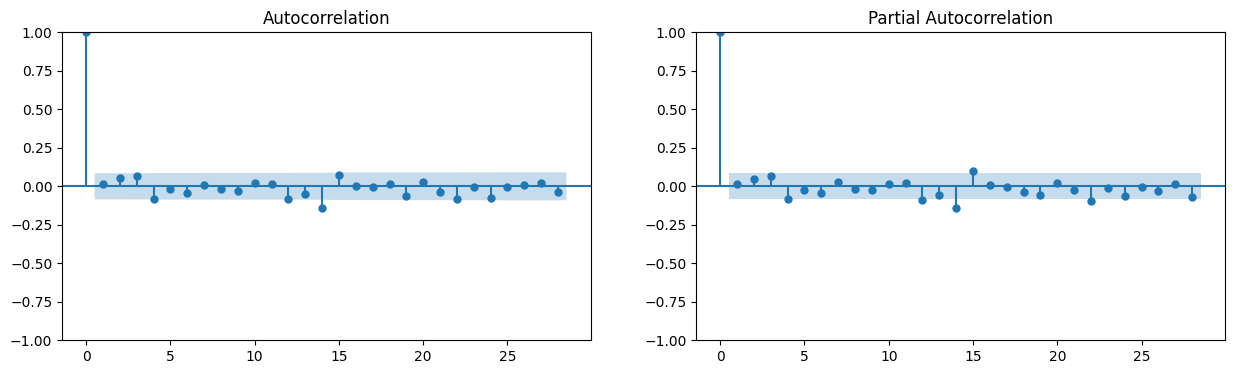

In [68]:
# Identification des paramètres p et q : ici nous devons analyser le graohe des autocorrelation et des autocorrelations partielles

fig, axes = plt.subplots(1, 2, figsize=(15,4))
plot_acf(data['S&P_TSX_Der_diff'].dropna(), ax=axes[0])
plot_pacf(data['S&P_TSX_Der_diff'].dropna(), ax=axes[1], method='ywm')
plt.show()

## Les deux graphiques montrent un seul pic significatif au premier décalage, suivi d'un retour rapide vers zéro donc le modèle inclut un seul terme autorégressif (AR) et un seul terme de moyenne mobile (MA). On peut donc sugerer un modèle ARMA(1,1),

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            S&P_TSX_Der   No. Observations:                  530
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -5193.913
Date:                Sun, 02 Jun 2024   AIC                          10395.826
Time:                        20:05:57   BIC                          10412.902
Sample:                             0   HQIC                         10402.511
                                - 530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IAC_CAN     1.048e+04    291.327     35.964      0.000    9906.240     1.1e+04
ar.L1          0.9882      0.008    117.220      0.000       0.972       1.005
ma.L1         -0.7179      0.035    -20.289      0.0

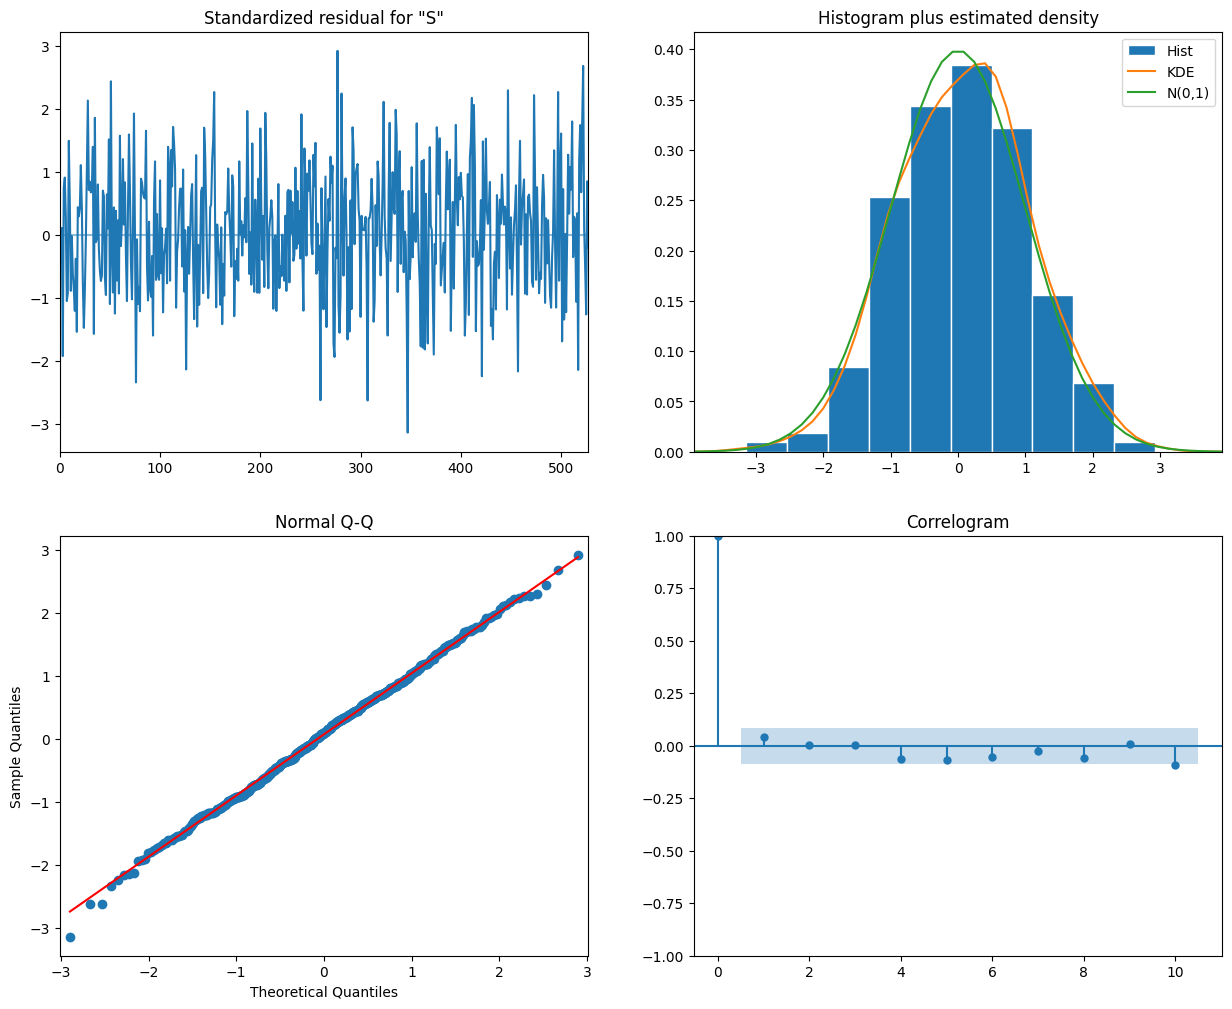

In [69]:

from statsmodels.tsa.statespace.sarimax import SARIMAX


# CONSTRUCTION DU MODELE ARMAX AVEC ORDRE DE DIFFERENCIATION 0

model = SARIMAX(data['S&P_TSX_Der'],exog=data['IAC_CAN'],
                order=(1, 0, 1),  # (p, d, q) où p est l'ordre AR, d est l'ordre de différenciation, q l'ordre MA
                enforce_stationarity=False,enforce_invertibility=False)

# Ajustement du modèle
results = model.fit()

# Affichage du résumé du modèle
print(results.summary())

# Analyses des résidus .
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### **COMMENTAIRES ET INTERPRETATIONS DES STATISTIQUES :**

**IAC_CAN :** Le coefficient est extrêmement significatif avec un z-score très élevé, indiquant une relation forte et statistiquement significative entre l'*indice Actuariel Climatique Canadien* et la dépendance de l'indice boursier *S&P_TSX*. Le coefficient est de 10480 avec une très petite p-value, ce qui indique une contribution significative à chaque unité d'augmentation de *IAC_CAN*.

**ar.L1 (coefficient du terme autorégressif) :** Très proche de 1 (0.9882) avec une p-value extrêmement basse, suggérant une forte persistance dans les données de série temporelle. Cela signifie que les valeurs passées de S&P_TSX sont très prédictives des valeurs futures.

**ma.L1 (coefficient du terme de moyenne mobile) :** Négatif (-0.7179) et significatif, ce qui indique que le modèle ajuste pour compenser les erreurs passées dans les prédictions des valeurs de S&P_TSX.

**AIC (Akaike Information Criterion) et BIC (Bayesian Information Criterion) : **Ces valeurs (10395.826 pour AIC et 10412.902 pour BIC) sont utilisées pour évaluer la qualité du modèle. Dans ce contexte, elles servent surtout de référence pour comparer ce modèle à d'autres configurations potentielles qui pourraient avoir des ordres différents ou des variables exogènes additionnelles.

**Log Likelihood :** La valeur est -5193.913, reflétant la qualité de l'ajustement du modèle aux données observées. Plus cette valeur est élevée, meilleur est l'ajustement.


**Ljung-Box Test :** Le test de Ljung-Box examine l'autocorrélation des résidus à différents lags. La p-value de 0.33 au premier lag suggère qu'il n'y a pas d'autocorrélation significative à ce lag, ce qui est bon pour un modèle de série temporelle.

**Jarque-Bera Test :** Le test de Jarque-Bera teste la normalité des résidus. Une p-value de 0.85 indique que la distribution des résidus est normale.

**Heteroskedasticity Test :** Ce test vérifie la constance de la variance des résidus. Le test n'a pas trouvé d'hétéroscédasticité significative, comme indiqué par la p-value de 0.28.


### **CONCLUSION ET RECOMMANDATIONS :**
Ce modèle semble être performant avec des résidus bien comportés selon les tests statistiques.
La forte dépendance et la contribution significative de la variable de l'indice Actuariel Climatique Canadien  **(IAC_CAN)** indiquent que cette variable exogène joue un rôle important dans la prédiction des mouvements de l'indice boursier **(S&P_TSX)**. Cependant, la proximité du coefficient **ar.L1** à 1 suggère que le modèle pourrait être à la limite de la non-stationnarité, ce qui pourrait nécessiter une investigation supplémentaire ou un ajustement du modèle, comme l'introduction d'une différenciation ou l'examen de la stabilité des paramètres dans le temps.

### **COMMENTAIRES ET INTERPRETATIONS DES GRAPHIQUES :**


Le graphique des Résidus Standardisés ne montre pas de structure systématique apparente dans les erreurs, ce qui suggère que le modèle capture bien la dynamique sous-jacente des données. La variabilité pourrait indiquer des chocs externes non capturés par le modèle ou une possible hétéroscédasticité.

L'histogramme des résidus, superposé avec une estimation de la densité noyau (KDE) et une distribution normale théorique, montre que les résidus sont relativement bien alignés avec la courbe normale, mais avec quelques écarts comme le montrent les queues légèrement plus épaisses comparées à la distribution normale théorique. Cela pourrait indiquer la présence de quelques valeurs extrêmes

 Le graphique Q-Q suggère que les résidus suivent approximativement une distribution normale, à l'exception des extrémités où il y a des indications de queues lourdes. Cela confirme l'observation faite dans l'histogramme et pourrait être un signe de kurtosis excessif ou de la présence de valeurs aberrantes.

 Le correlogramme indique qu'il n'y a pas d'autocorrélation significative dans les résidus. Cela suggère que le modèle a bien capturé la dépendance temporelle dans les données, laissant peu ou pas d'informations prédictives dans les résidus.



# **QUELQUES AMÉLIORATIONS DU MODÈLE ARMA PRECEDENT**



### *   **Examen de la stabilité des paramètres dans le temps.**


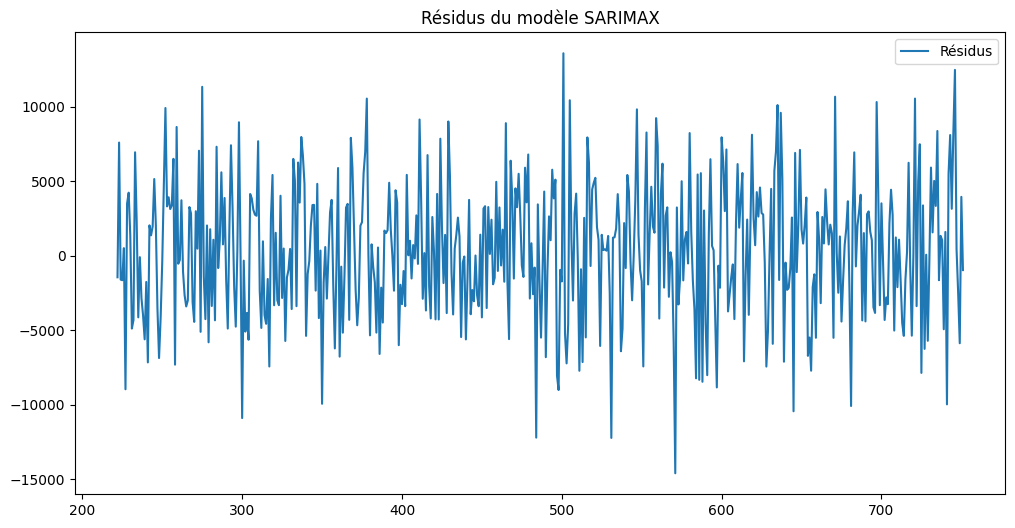

In [70]:
# l'examen de la stabilité des paramètres dans le temps.
# Affichage des résidus
plt.figure(figsize=(12, 6))
plt.plot(results.resid, label='Résidus')
plt.title('Résidus du modèle SARIMAX')
plt.legend()
plt.show()



### Les résidus oscillent autour de zéro, ce qui est en général un bon signe indiquant que le modèle n'est pas biaisé systématiquement. Il n'y a pas de tendance claire ou de motif saisonnier évident dans les résidus, ce qui suggère que le modèle a bien capturé les composantes principales de la série temporelle. Cependant, l'absence de tendance ne garantit pas que tous les processus dynamiques aient été capturés. De plus l'amplitude des fluctuations semble être assez grande, avec des résidus allant jusqu'à ±15000, ce qui peut indiquer une volatilité significative non capturée par le modèle.

.

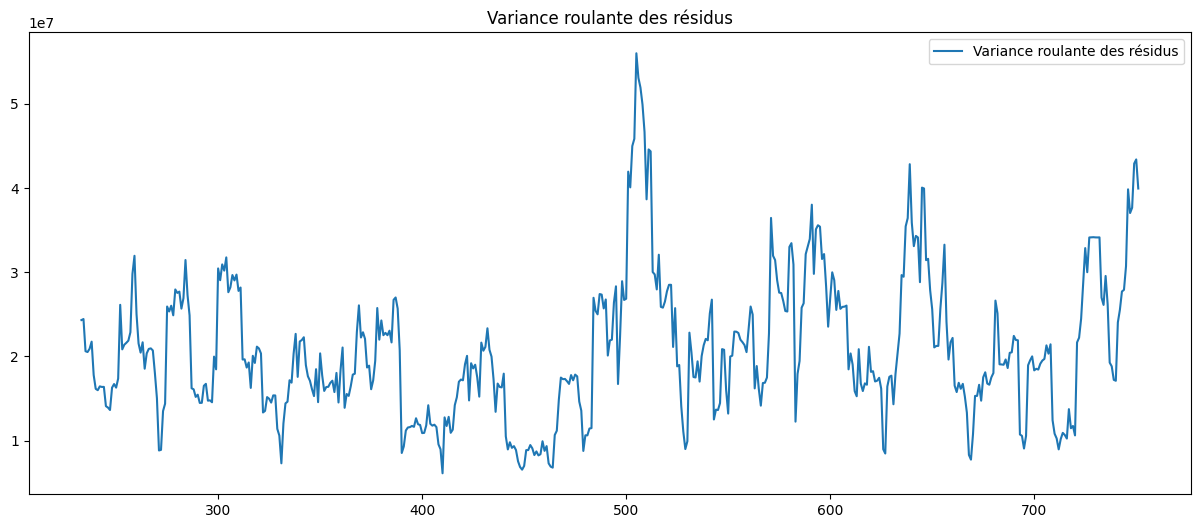

In [71]:
# Affichage de la variance roulante des résidus pour voir la stabilité de la variance
rolling_var = results.resid.rolling(window=12).var()
plt.figure(figsize=(15, 6))
plt.plot(rolling_var, label='Variance roulante des résidus')
plt.title('Variance roulante des résidus')
plt.legend()
plt.show()

Le graphique montre des fluctuations significatives dans la variance des résidus au fil du temps. La variance varie entre environ **1.25x10^7** et presque **5x10^7**, avec plusieurs pics et creux notables. Cette variabilité indique que les résidus ne sont pas homoscédastiques (c'est-à-dire que la variance des résidus n'est pas constante).

En effet, les pics indiquent des périodes où les résidus sont plus dispersés (plus grande variance)où les prédictions du modèle sont moins stables et moins précises, ce qui pourrait indiquer des réponses du modèle aux chocs externes ou internes non capturés par le modèle, tandis que les creux montrent des périodes de moindre dispersion.

La variance roulante des résidus indique clairement une hétéroscédasticité, ce qui peut affecter la validité des tests statistiques et la confiance dans les prédictions du modèle. Ainsi, le modèle actuel peut ne pas capturer complètement tous les aspects dynamiques des données, et que des modifications ou des extensions du modèle pourraient être nécessaires pour améliorer la précision des prédictions et la validité des inférences statistiques.

In [72]:
#TEST DE WHITE
from statsmodels.stats.diagnostic import het_white

# Préparer les données pour le test de White
residus = results.resid
exog = data[['IAC_CAN']]  # Utilisez les mêmes variables exogènes que dans votre modèle
exog_const = sm.add_constant(exog)  # Ajouter une constante aux variables explicatives pour le test

# Effectuer le test de White sur les résidus
test_stat, p_value, f_stat, f_p_value = het_white(residus, exog_const)

# Afficher les résultats du test de White
print("Statistique du test de White:", test_stat)
print("P-value du test de White:", p_value)
print("Statistique F:", f_stat)
print("P-value du F-test:", f_p_value)



Statistique du test de White: 133.70635918287243
P-value du test de White: 9.247684523318111e-30
Statistique F: 88.90282865009372
P-value du F-test: 5.380406785101783e-34


### ***Avec ces valeurs de p-value la présence d'hétéroscédasticité dans les résidus est confirmée et signifie que les estimations standards des erreurs des coefficients du modèle sont biaisées, ce qui peut mener à des conclusions erronées concernant la significativité des variables du modèle.***

In [73]:

#TEST  de Breusch-Pagan

from statsmodels.stats.diagnostic import het_breuschpagan

# Variables exogènes utilisées dans le modèle
# Nous devons inclure une constante dans les variables exogènes pour le test
exog = sm.add_constant(data[['IAC_CAN']])

# Effectuer le test de Breusch-Pagan
bp_test = het_breuschpagan(residus, exog)

# Afficher les résultats du test de Breusch-Pagan
bp_stat, bp_pvalue, fvalue, fpvalue = bp_test
print("Statistique de Breusch-Pagan :", bp_stat)
print("P-value de Breusch-Pagan :", bp_pvalue)
print("Statistique F :", fvalue)
print("P-value du F-test :", fpvalue)


Statistique de Breusch-Pagan : 0.8063889502087007
P-value de Breusch-Pagan : 0.36919001691205655
Statistique F : 0.8045701172876167
P-value du F-test : 0.3701392739693198


### ***Avec ces valeurs de p-value la présence d'hétéroscédasticité dans les résidus ne peut pas être confirmée et et contredit les resultats du precedent test. Nous allons complèter le test de Goldfeld-Quandt et le test non paramétriques***

In [74]:
#TEST  de Goldfeld-Quandt

from statsmodels.stats.diagnostic import het_goldfeldquandt

# Présumons que les résidus viennent de votre modèle SARIMAX et que vous avez une variable explicative
residus = results.resid

variables = data['IAC_CAN']  # ou une autre variable pertinente

# Ajouter une constante aux variables explicatives pour le test si nécessaire
exog = sm.add_constant(variables)  # Assurez-vous que 'variables' est un DataFrame pour utiliser add_constant

# Effectuer le test de Goldfeld-Quandt
gq_test = het_goldfeldquandt(residus, exog, split=0.5, drop=0.1)

# Afficher les résultats du test de Goldfeld-Quandt
gq_stat, gq_pvalue,nature = gq_test
print("Statistique du test de Goldfeld-Quandt :", gq_stat)
print("P-value du test de Goldfeld-Quandt :", gq_pvalue)

Statistique du test de Goldfeld-Quandt : 1.7489561941999459
P-value du test de Goldfeld-Quandt : 1.3826014879476636e-05


### ***Avec cette valeur de p-value la présence d'hétéroscédasticité dans les résidus peut être confirmée .***

                            OLS Regression Results                            
Dep. Variable:          resid_squared   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     88.90
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           5.38e-34
Time:                        20:05:59   Log-Likelihood:                -9766.3
No. Observations:                 530   AIC:                         1.954e+04
Df Residuals:                     527   BIC:                         1.955e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.538e+07   1.27e+06     

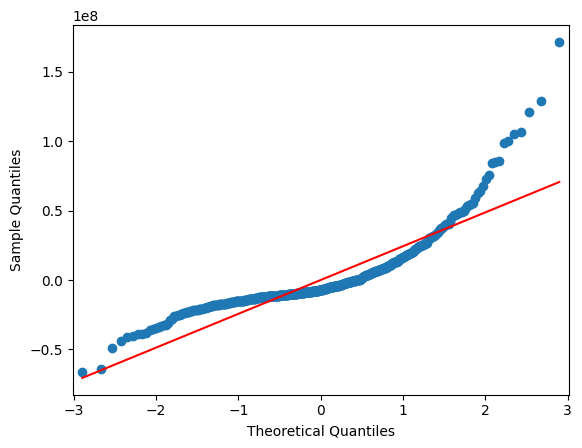

Shapiro-Wilk test statistic: 0.7948610186576843
P-value: 2.535199268963698e-25


In [75]:
#TEST non paramétriques

from statsmodels.formula.api import ols

# Supposons que les résidus et les variables indépendantes sont stockés dans un DataFrame 'data'
data['resid_squared'] = results.resid ** 2  # Carrés des résidus du modèle SARIMAX

# Vous pourriez vouloir inclure non seulement les variables indépendantes mais aussi leurs carrés ou d'autres transformations
data['IAC_CAN_squared'] = data['IAC_CAN'] ** 2

# Construire un modèle pour les carrés des résidus
model = ols('resid_squared ~ IAC_CAN + IAC_CAN_squared', data=data).fit()

# Résumé du modèle pour examiner la signification des coefficients
print(model.summary())

# Afficher également les diagnostics des résidus pour ce modèle
sm.qqplot(model.resid, line='s')
plt.show()

# Tester la normalité des résidus de ce modèle
from scipy.stats import shapiro
statistic, p_value = shapiro(model.resid)
print('Shapiro-Wilk test statistic:', statistic)
print('P-value:', p_value)



**R-squared (R²) :** 0.252 - Environ 25.2% de la variance des carrés des résidus est expliquée par ce modèle. Cela indique un ajustement modeste du modèle aux données, mais une portion significative de la variance reste non expliquée.

**F-statistic et Prob (F-statistic) :** La statistique F est de 88.90 avec une p-value extrêmement faible (5.38e-34), indiquant que le modèle est globalement statistiquement significatif.

**Durbin-Watson :** 1.965 - Indique une faible autocorrélation entre les résidus de la régression.








ces résultats suggèrent une présence significative d'hétéroscédasticité ainsi que des comportements non linéaires et non normaux dans les résidus.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            S&P_TSX_Der   No. Observations:                  530
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3921.581
Date:                Sun, 02 Jun 2024   AIC                           7851.161
Time:                        20:05:59   BIC                           7868.230
Sample:                             0   HQIC                          7857.844
                                - 530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IAC_CAN       10.7750     30.371      0.355      0.723     -48.752      70.302
ar.L1          0.9743      0.184      5.305      0.000       0.614       1.334
ma.L1         -1.0244      0.185     -5.552      0.0

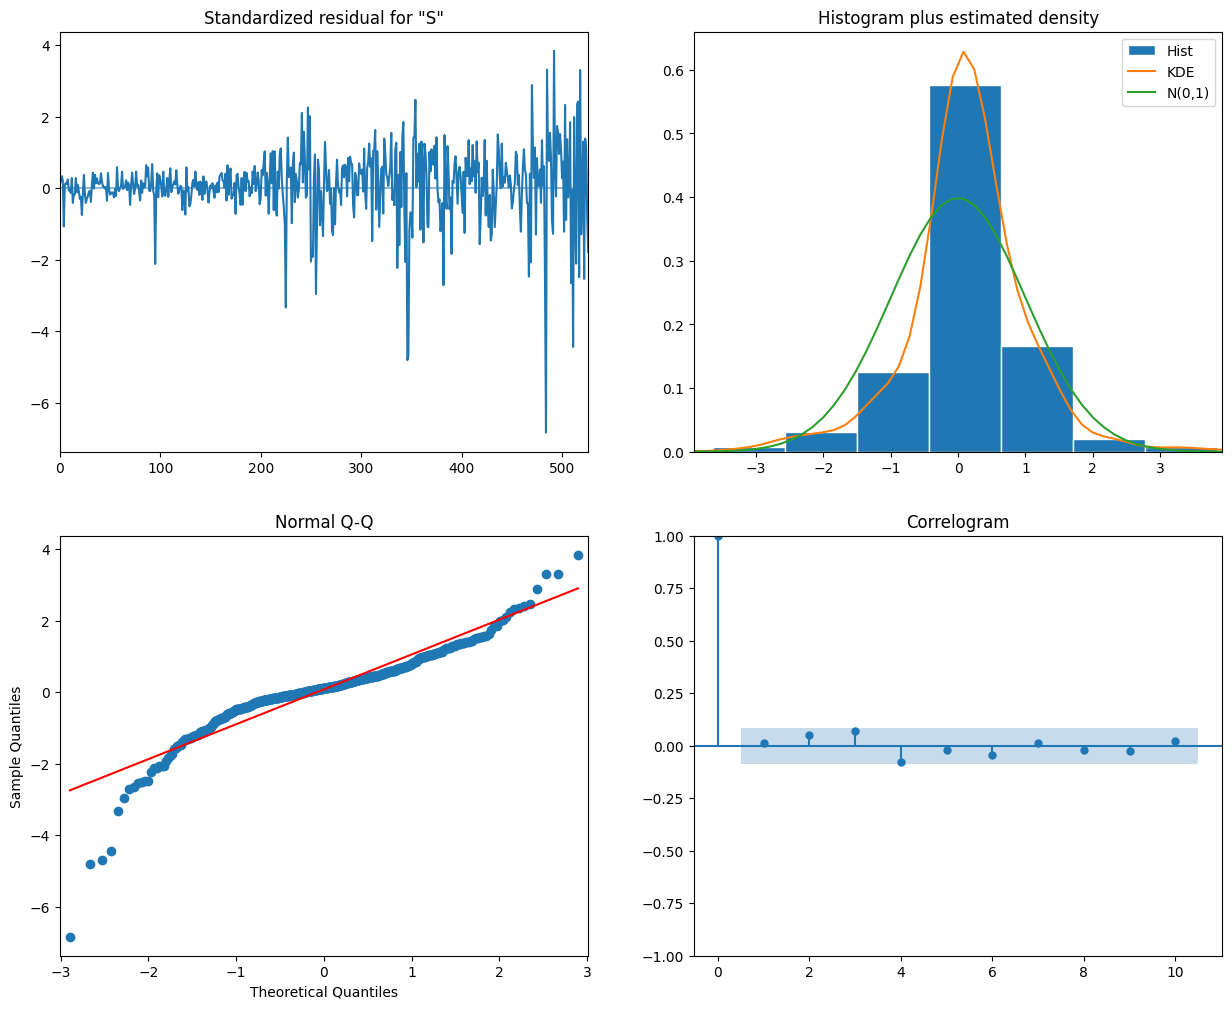

In [76]:

from statsmodels.tsa.statespace.sarimax import SARIMAX


# CONSTRUCTION DU MODELE ARIMA ARMAX AVEC ORDRE DE DIFFERENCIATION 1

model = SARIMAX(data['S&P_TSX_Der'],
                exog=data['IAC_CAN'],
                order=(1, 1, 1),  # (p, d, q) où p est l'ordre AR, d est l'ordre de différenciation, q l'ordre MA
                enforce_stationarity=False,
                enforce_invertibility=False)

# Ajuster le modèle
results = model.fit()

# Afficher le résumé du modèle
print(results.summary())

# Diagnostics pour vérifier les résidus etc.
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### ***On peut remarquer que la statistique de l'Indice Actuariel Climatique n'est pas significatif et en plus l'hétéroscédasticité  persiste. Nous allons essayer le modele GARCH***

In [77]:
pip install arch

In [78]:
from arch import arch_model

# Création du modèle GARCH
garch = arch_model(residus, p=1, q=1)  # Modèle GARCH(1,1)
results_garch = garch.fit(update_freq=3)
print(results_garch.summary())



Iteration:      3,   Func. Count:     18,   Neg. LLF: 5214.129055229146
Iteration:      6,   Func. Count:     35,   Neg. LLF: 5212.133358431262
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5212.133358431262
            Iterations: 7
            Function evaluations: 39
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5212.13
Distribution:                  Normal   AIC:                           10432.3
Method:            Maximum Likelihood   BIC:                           10449.4
                                        No. Observations:                  530
Date:                Sun, Jun 02 2024   Df Residuals:                      529
Time:            

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.039e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


## **INTERPRESTATION ET COMMENTAIRE :**
A partir de ces résultat on constate que seul le coefficient **beta[1]** est statistiquement significatif. En effet ce coefficient est de **0.9777** avec une erreur standard de **0.387** et une p-value de **0.01161**. Cela montre une forte persistance dans la volatilité de la série temporelle, indiquant que les conditions de volatilité d'un jour influencent grandement les conditions de volatilité du jour suivant.

La moyenne **'mu'** estimée est de 342.8323 avec une erreur standard de 201.288. La valeur t de 1.703 et la p-value de 0.08853 indiquent que cette moyenne n'est pas statistiquement significative au seuil de confiance de 5%. Cela pourrait suggérer que la constante n'est pas nécessaire dans le modèle, ou que la série de données centrée autour de zéro pourrait être mieux adaptée sans cette constante.
Le modèle montre une forte persistance de la volatilité mais l'insignifiance de certains paramètres et les grandes incertitudes associées aux estimations peuvent signifier un problème de specification et nécessitent une évaluation plus approfondie de la spécification du modèle et potentiellement des ajustements pour améliorer l'adéquation et la précision du modèle.

In [79]:
# Création du modèle EGARCH avec distribution normale
egarch_model = arch_model(residus, vol='EGARCH', p=1, q=2)

egarch_results = egarch_model.fit(update_freq=3)
print(egarch_results.summary())


Iteration:      3,   Func. Count:     21,   Neg. LLF: 119076663.63688175
Iteration:      6,   Func. Count:     46,   Neg. LLF: 278803208.7239604
Iteration:      9,   Func. Count:     69,   Neg. LLF: 274020187.52538407
Iteration:     12,   Func. Count:     92,   Neg. LLF: 5249.868125411851
Iteration:     15,   Func. Count:    111,   Neg. LLF: 5210.647336847482
Iteration:     18,   Func. Count:    129,   Neg. LLF: 5210.540794598071
Iteration:     21,   Func. Count:    147,   Neg. LLF: 5210.538467854486
Iteration:     24,   Func. Count:    165,   Neg. LLF: 5210.538291966858
Iteration:     27,   Func. Count:    183,   Neg. LLF: 5210.52751188679
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5210.525476958024
            Iterations: 31
            Function evaluations: 194
            Gradient evaluations: 29
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                   None   R-squared:            

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.039e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


## **INTERPRESTATION ET COMMENTAIRE :**

Pour le modèle EGARCH, la moyenne **'mu'** estimée est de **375.1283** avec un écart type de **193.933** puis a un t-score de **1.934**. avec une p-value de **0.05307**, la moyenne n'est pas statistiquement significative au seuil de 5%, mais elle frôle la significativité.
**omega :** le coefficient est estimé à **7.6203**, et est statistiquement significatif avec une p-value de **0.01201**. Cette valeur montre que la réponse de la volatilité aux informations qui n'ont pas été capturées par les termes passés est modérément importante.

**alpha[1]:** Coefficient de **-0.1345** avec une p-value de **0.006035**, indiquant une signification statistique. Le signe négatif sur alpha signifie que la volatilité réagit différemment selon le signe des chocs précédents, reflétant l'effet de levier: dans ce cas par exemple les chocs négatifs augmentent la volatilité plus que les chocs positifs de même magnitude.

**beta[1]:** le coefficient est estimé à 0.0000 avec une p-value de 1.000. on peut suggerer donc une absence totale d'effet de ce paramètre sur la volatilité, ce qui est peu plausible et peut indiquer un problème de spécification ou de convergence du modèle.
**beta[2]:** le coefficient est estimé à 0.5471,et est statistiquement significatif avec une p-value de 0.02474, indiquant une certaine persistance dans les conditions de volatilité.


 La valeur positive d'omega et la valeur négative d'alpha[1] avec des significations statistiques suggèrent que le modèle capture bien la dynamique conditionnelle de la volatilité, particulièrement l'effet de levier.
Problèmes potentiels avec beta[1]: La valeur nulle et non significative de beta[1] pourrait indiquer que les paramètres initiaux pour la partie de persistance de la volatilité n'étaient pas bien spécifiés ou que le modèle n'a pas convergé adéquatement. Il peut être nécessaire de réexaminer les spécifications du modèle ou d'utiliser des paramètres de départ différents lors de l'ajustement.
Validité de beta[2]: La valeur significative pour beta[2] montre qu'une partie de la persistance est capturée, mais le modèle pourrait être amélioré par un réajustement ou l'utilisation d'une autre distribution des erreurs, comme la distribution t de Student, pour mieux rendre compte des queues lourdes.

# **CONCLUSION**

 La valeur positive d'omega et la valeur négative d'**alpha[1]** avec des significations statistiques suggèrent que le modèle capture bien la dynamique conditionnelle de la volatilité, particulièrement l'effet de levier.
La valeur nulle et non significative de **beta[1]** pourrait être un élément nécessaire pour réexaminer les spécifications du modèle ou d'utiliser des paramètres de départ différents lors de l'ajustement.
La valeur significative pour **beta[2]** montre qu'une partie de la persistance est capturée, mais le modèle pourrait être amélioré par un réajustement ou l'utilisation d'une autre distribution des erreurs, comme la distribution t de Student, pour mieux rendre compte des queues lourdes.

In [80]:
# Création du modèle EGARCH avec distribution de student

egarch_model = arch_model(residus, vol='EGARCH', p=1, q=2,dist='t')

egarch_results = egarch_model.fit(update_freq=3)
print(egarch_results.summary())

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.039e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      3,   Func. Count:     24,   Neg. LLF: 10257.316239892401
Iteration:      6,   Func. Count:     60,   Neg. LLF: 27991.99027320362
Iteration:      9,   Func. Count:     87,   Neg. LLF: 8469.311936935537
Iteration:     12,   Func. Count:    110,   Neg. LLF: 5213.446766176106
Iteration:     15,   Func. Count:    131,   Neg. LLF: 5212.303601441645
Iteration:     18,   Func. Count:    152,   Neg. LLF: 5211.2575406804
Iteration:     21,   Func. Count:    173,   Neg. LLF: 5210.822914558645
Iteration:     24,   Func. Count:    194,   Neg. LLF: 5210.612541979449
Iteration:     27,   Func. Count:    228,   Neg. LLF: 5210.591288144308
Iteration:     30,   Func. Count:    249,   Neg. LLF: 5210.59095809205
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5210.590943498832
            Iterations: 34
            Function evaluations: 275
            Gradient evaluations: 32
                        Constant Mean - EGARCH Model Results            

## **INTERPRESTATION ET COMMENTAIRE :**

mu: La constante estimée est de **343.7109** avec un écart type de **194.386**. Le t-score est de** 1.768** avec une p-value de **0.07703** indiquant que cette estimation de la moyenne n'est pas statistiquement significative au seuil de 5%. Cela suggère que la moyenne estimée n'affecte pas substantiellement le modèle.

**omega:** Le paramètre omega est de **7.6203** avec une p-value de **0.01136**, montrant que cette estimation est statistiquement significative. Cela signifie que le niveau bas de la volatilité conditionnelle est significativement différent de zéro.

**alpha[1]:** Le coefficient alpha est de **-0.1343** avec une p-value de **0.006356**. Cette valeur est significative et indique que les chocs récents influent de manière asymétrique sur la volatilité, typique de l'effet de levier dans les modèles EGARCH.

**beta[1] et beta[2]:** Le premier est pratiquement nul avec une p-value de **1.000**, ce qui peut indiquer soit un problème de convergence, soit une spécification inadéquate. Le second est de **0.5472** et est significatif, montrant une certaine persistance dans la volatilité.


**nu (degrés de liberté):** La valeur estimée est de **221.3831** avec un écart type de **186.828**, produisant un t-score de **1.185** et une p-value de **0.236**. Cette estimation n'est pas significative. suggère que le nombre de degrés de liberté pourrait être trop élevé, impliquant que la distribution pourrait se rapprocher de la normale.


**Ces éléments indiquent que bien que le modèle capture certains aspects de la dynamique de la volatilité, il y a des améliorations et des validations supplémentaires nécessaires pour assurer la précision et la robustesse des estimations.**